<h1><center>Monte Carlo Simulations:</center></h1>
<h2><center>Driven Damped Oscillator</center></h2>
<h3><center>by Ryan Dunagin ($\textit{dunaginryan@gmail.com}$), Jonathan Gutierrez ($\textit{gutierrezjon87@unm.edu}$) and Jehanzeb Chaudhry ($\textit{jehanzeb@unm.edu}$)</center></h3>

Here we aim to compare two different ways of solving a popular problem in physics: $\textbf{The Driven Damped Oscillator}$. Namely the system involves a mass, m, on a spring that follows $\textit{Hooke's Law}$ (with spring coefficient $k$). The mass experiences  air resistance proportional to velocity and hence we say the oscillator is damped. This air resistance is modeled by $-\beta \dot{x}$,  where $\dot{u} = \frac{du}{dt}$. 
Finally, it is being driven by a sinusoidal force with magnitude, $A$, and frequency, $\omega$. This leads to   the following differential equation for the displacement $x$ of the driven damped oscillator:

$$
\begin{equation}
\Large
m\ddot{x} + \beta \dot{x} + kx = Acos(wt)
\end{equation}
$$

The equation is solved with initial conditions for the displacement $x$ and velocity $\dot{x}$.
The different input parameters, $m, A, \beta, A, w$, leads to solutions of varying behavior.  The purpose of this notebook is to demonstrate the use of numerical and stochastic errors in Monte Carlo simulation for this equation. First, we  derive an analytical solution to this linear equation and then  employ a numerical method to solve it.

<h3><center> An Analytical Solution</center></h3>

The analytical solution to this $\textbf{Ordinary Differential Equation}$, can be found using complex analysis (see http://hyperphysics.phy-astr.gsu.edu/hbase/oscdr.html for an overview). We start off by decomposing the solution into a homogeneous and non-homogenous part.  The $\textbf{homogeneous}$ solution (labeled $x_H$) is the solution to the ordinary differential equation (ODE),

$$
\begin{equation}
\Large
m\ddot{x} + \beta \dot{x} + kx = 0
\end{equation}
$$

This solution is also called the $\textbf{transient}$ solution as it tends to decay to 0 over time. Naturally, this is how the system would behave if there were no driving forces involved. The second solution is called the $\textbf{non-homogeneous}$ solution, labeled $x_P$. It is also called the $\textbf{steady state}$ solution, since the system tends towards this solution after long enough time.

We apply an  $\textbf{ansatz}$ $x = Ce^{rt}$ to the above equation which leads to the following polynomial.
$\begin{equation}
\large
mr^2 + \beta r + k = 0 \implies r = -\frac{\beta}{2m} \pm i\sqrt{\frac{k}{m} - \frac{\beta^2}{4m^2}}
\end{equation}
$

This polynomial has two potentially complex roots. The real component, ($-\frac{\beta}{2m}$) is negative, leading to exponential decay. We'll call the decay constant $\gamma$. The imaginary part of the exponent causes oscillations at the natural frequency $\omega_B$. Further, $\omega_0 \equiv \sqrt{\frac{k}{m}}$  will refer to the is the system's natural frequency $\textit{if}$ there were no damping involved. That is, if $\beta$ = 0 then $\omega_B = \omega_0$. The full homogeneous solution is:

$\begin{equation}
\large
x_H = e^{-\gamma}\Big[C_1 \cos(\omega_Bt) + C_2 \sin(\omega_Bt)\Big] \qquad \text{where} \quad \omega_B^2 \equiv \frac{k}{m} - \frac{\beta^2}{4m^2} = \omega_0^2 - \gamma^2 
\end{equation}
$

Note that this solution is only valid in the $\textbf{underdamped}$ case. This means that $\beta \dot{x}$ is small enough to not overpower the springs restorative force. Conversely, if the system is overdamped, then the transient solution will decay. The solution is underdamped if and only if: 

$ \large \gamma^2 < \omega_0^2 = \frac{k}{m}$,

or equivalently:

$\large \beta^2 < 4km $

This is something we must verify in all cases, before passing our input parameters into our analytical solution. 
To derive the steady state solution, we  consider the following complex ansats:

$
\begin{equation}
\large x = De^{i\omega t}
\end{equation}
$

We plug this ansatz in the original oscillator equation.
The solving process is very similar to the above: we assume an exponential solution but here we explicitly make it complex. The frequency, $\omega$, is chosen to match the driving frequency. This leaves us with $D$, a complex coefficient, which we can solve for by differentiating our ansatz twice and plugging it into the ODE. Given that the right hand side, RHS, of the ODE has a cosine term, it's not immediately obvious how we are to neatly divide out all exponential terms, but we $\textit{can}$ do this here as well. Consider replacing $Acos(\omega t)$ with $Ae^{i\omega t}$. Because the cosine term is simply the real component of the RHS, we can solve for D and then simply consider the steady state solution, $x_p$, as the real component of our ansats:

$
\begin{equation}
\large
x_P = Re[De^{i\omega t}] = |D|\cos(\omega t + \psi)
\end{equation}
$

What is left to find is the magnitude of D and its phase on the complex plane, $\psi$. After cancelling out exponential terms we get a quadratic equation in $\omega$, which looks like this:

$
\begin{equation}
\large
-D\omega^2 + iD\frac{\beta}{m}\omega + D\omega_0^2 = \frac{A}{m} \implies \Large D = \frac{A}{m(\omega_0^2 - \omega^2 + i\frac{\beta}{\omega})}
\end{equation}
$

Therefore, the magnitude of $D$, and phase, calculated as $\psi$, are respectively:

$
\begin{equation}
\Large
|D| = \frac{A}{m\sqrt{ (\omega_0^2 - \omega^2)^2 + (\frac{\beta}{\omega})^2 }} \qquad \psi = -\tan^{-1}(\frac{\beta \omega}{m(\omega_0^2 - \omega^2)})
\end{equation}
$

After finding both solutions, solving the initial value problem can be done by simply adding them together.

$
\begin{equation}
\large
x_G = x_P + x_H = e^{-\gamma}\Big[C_1 \cos(\omega_Bt) + C_2 \sin(\omega_Bt)\Big] + |D|\cos(\omega t + \psi)
\end{equation}
$

We can use known values of the initial position and velocity ($x_0$ and $v_0$ respectively) to solve for $C_1$ and $C_2$. Applying these conditions for $t$ = 0, one can algebraically show that $C_1$ and $C_2$ are:

$C_1 = x_0 - |D|\cos(\psi) \qquad C_2\omega_B = v_0 + \gamma C_1 + |D|\omega\sin(\psi)$


The main thing to notice here is the fact that $|D|$ can become arbitrarily large, if the system is driven at a frequency $\omega = \omega_B$ and there is no damping ($\beta = 0$). In such a case, the system will oscillate at that frequency with an amplitude that continues to grow indefinitely (in theory at least). This phenomenon is known as $\textit{resonance}$, and it can be studied further here by bringing $w$ close to $w_B$. The system can still hit resonance even if there is damping. In that case, the finite $\textbf{amplitude response}$ is calculated as the ratio $|D|/A$. This ratio is always maximized at resonance. 

<h3><center>Numerical Solution: Euler's Method</center></h3>

Euler's method will be used to solve this ODE, given a pair of initial conditions, $x_0$ and $v_0$. We perform Euler's method on both the position and velocity, labeled $y_1$ and $y_2$ respectively. In other words, we consider an equivalent first-order system:

$\begin{equation}
\dot{y_1}(t) = y_2(t) \qquad
\dot{y_2}(t) = \ddot{y_1}(t) = - \frac{\beta}{m}y_2 - \frac{k}{m}y_1 + \frac{A}{m}cos(wt)
\end{equation}$

and apply Euler's method to this system. 

<h3><center>Python Code for Analytical and Numerical Solution</center></h3>

In [84]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as pyt
# Font sizes
pltsz = 8
pyt.rc('font',size=2.5*pltsz)
pyt.rc('xtick',labelsize=2*pltsz)
pyt.rc('ytick',labelsize=2*pltsz)
pyt.rc('axes',labelsize=2.5*pltsz)
pyt.rc('legend',fontsize=2*pltsz)

def run_analytical(m,beta,k,A,w,a,b,ta,x_0,v_0,frequencies = True):
    # Calculated Frequencies
    w_0 = np.sqrt(k/m) # Undamped freq
    w_B = np.sqrt(w_0**2 - (beta/2/m)**2) # Damped freq
    
    # Uncomment below to see behavior close to resonance 
    #w = w_B*0.95 
    
    #It is convenient to define Dmod as negative when driving above resonance, and positive otherwise
    if w < w_0:
        Dmod = A/m/np.sqrt( (w_0**2 - w**2)**2  + (beta*w/m)**2 )
    else:
        Dmod = -A/m/np.sqrt( (w_0**2 - w**2)**2  + (beta*w/m)**2 )
    
    if frequencies:
        # Amplitude response CAN GET LARGE IF AT RESONANCE AND UNDAMPED (beta = 0 and w = w_B)
        print(f'w_0 = {w_0}')
        print(f'w_B = {w_B}')
        print(f'w = {w}')
        print(f'The amplitude response ratio is: {Dmod/A}')

    psi = -np.arctan(beta*w/m/(w_0**2 - w**2)) # D phase
    gam = beta/(2*m) # decay constant
    C1 = x_0 - Dmod*np.cos(psi)
    C2 = v_0/w_B + gam*C1/w_B + Dmod*w/w_B*np.sin(psi) 
    
    # Transient + Steady State Soln
    U = ( C1*np.cos(w_B*ta) + C2*np.sin(w_B*ta) )*np.exp(-gam*ta) + Dmod*np.cos(w*ta + psi)
    # Final Value
    Ufin = U[-1]
    return U, Ufin

# Defining a Numerical solution using Euler's method   
def eulers_method(m,beta,k,A,w,a,b,N,x_0,v_0,h):
    # Calculated Frequencies
    w_0 = np.sqrt(k/m) # Undamped freq
    w_B = np.sqrt(w_0**2 - (beta/2/m)**2) # Damped freq
    
    # Uncomment below to see behavior close to resonance 
    #w = w_B*0.95 
    
    y1 = np.zeros([N+1])
    y2 = np.zeros([N+1])
    y1p = np.zeros([N+1])
    y2p = np.zeros([N+1])
    t = np.linspace(a,b,N+1)
    
    #initialize
    y1[0] = x_0
    y2[0] = v_0
    
    # calculates numerical solution iteratively
    for i in range(N):
        y1p[i] = y2[i]
        y2p[i] = -beta/m*y2[i] - k/m*y1[i] + A/m*np.cos(w*t[i])
        y2[i+1] = y2[i] + h*y2p[i]
        y1[i+1] = y1[i] + h*y1p[i]
    y1fin = y1[-1]
    return y1, y1fin, t


<h2><center>Convergence of Forward Euler</center></h2>

Euler's method has an error between the numerical solution and true solution that is (at worst) proportional to $h$, the time-step size, or in other words $O(h)$. 
Our goal below is to compare the analytical and numerical solutions to study this final error. We aim to check for convergence between solutions and confirm that the error is $O(h)$ (that is, it has a positive linear relationship with $h$). To do this, we must vary the step size in time ($h$) and find multiple numerical solutions. All of this is done in our first comparison. Below is the first error analysis, for varying h. We also plot the analytical and numerical solution for the finest value of $h$.

w_0 = 1.1832159566199232
w_B = 1.1771151175649728
w = 0.65
The amplitude response ratio is: 0.40409354247486945
Final Value (Analytical):0.838169917397355
Final Value (Numerical):0.8381705734149143


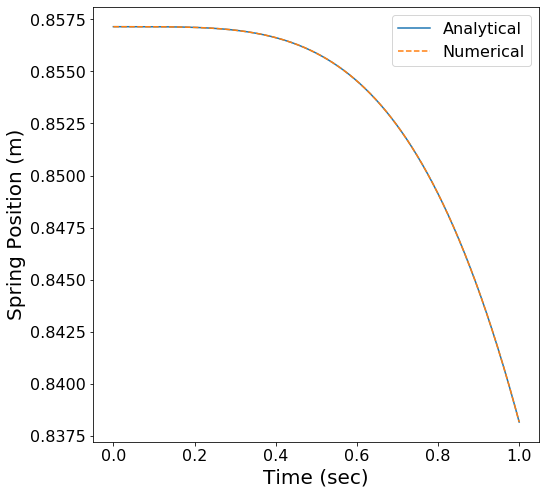

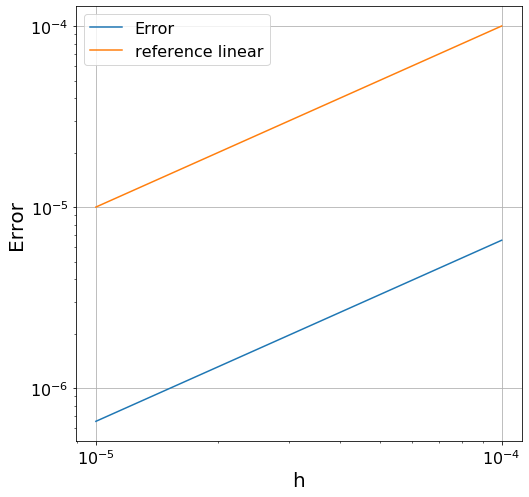

In [85]:
# Number of points to evalutate on each numerical solution
# Solution to IVP

#Parameter values
A = 3
m = 2.5
beta = 0.6
k = 3.5
w = 0.65

#Initial conditions:
x_0 = A*2/7
v_0 = 0

# Time array
a = 0 # start
b = 1 # end
ta = np.linspace(a,b,10**5)

# Running Analytical Solution for the full time array
U, Ufin = run_analytical(m,beta,k,A,w,a,b,ta,x_0,v_0)

# Running Numerical Solution for different h values
Num_pts = np.round(np.linspace(10**4,10**5,5))
Num_pts = Num_pts.astype(int)
h_var = (b - a)/Num_pts
Err = np.zeros(len(h_var))
save_run = len(h_var) - 1 # save last run
#save_run = 0 # save first run

for j,h in enumerate(h_var):
    y1, y1fin, t = eulers_method(m,beta,k,A,w,a,b,Num_pts[j],x_0,v_0,h)
    
    # Error in the numerical method when time t = b
    Err[j] = np.abs(y1fin - Ufin)
    
    if j == save_run:
        y_save = y1
        t_save = t

# plots the analytical soln and a saved numerical soln
pyt.figure(num = 1, figsize = (pltsz,pltsz))
pyt.plot(ta,U)
pyt.plot(t_save,y_save,'--')
pyt.legend(['Analytical','Numerical'], loc='upper right')
pyt.xlabel('Time (sec)')
pyt.ylabel('Spring Position (m)')

# h and Err should have a positive linear relationship for sufficiently large N (about 10^5 or larger):  
pyt.figure(num = 2, figsize = (pltsz,pltsz))
pyt.loglog(h_var,Err)
pyt.loglog(h_var, (1/Num_pts))
pyt.legend(['Error', 'reference linear'])
pyt.grid()
pyt.xlabel('h')
pyt.ylabel('Error')

print(f'Final Value (Analytical):{Ufin}\nFinal Value (Numerical):{y1fin}')

<h2><center>Generating Random Samples</center></h2>

After verifying convergence, it is interesting to uniformly, randomly sample the input parameters. Below, you may adjust the distributions on each parameter to the differential equation. For this experiment, we will be only randomly sampling two parameters: $k$ and $m$. Our $\beta$, $A$, and $\omega$ parameters will be fixed. 

In [86]:
# Array of parameters to test the numerical solution: N random samples

#np.random.seed(25) #uncomment this to reproduce tables used in final discussion

#Sampling ranges
m_low = 0.5
m_high = 4.5

k_low = 1.5
k_high = 5.5

#The parameters below are fixed (that is, not sampled)
beta = 1
A = 5.5
w = 0.75

# Checks the worst case scenario
if beta**2 >= 4*k_low*m_low:
    raise NameError('Overdamped cases exist')

N = 10000
def sample_hypercube(N):
    '''This function takes an N sized sample of parameters. Parameters are organised by collumns'''
    all_para = []
    all_para = np.reshape(all_para,[0,2])
    for i in range(N):
        para = np.random.uniform([m_low,k_low],[m_high,k_high])
        m_temp = para[0]
        k_temp = para[1]
        all_para = np.concatenate((all_para,np.reshape(para,[1,2])),axis=0)  
    return all_para

all_para = sample_hypercube(N)


<h2><center>Monte Carlo Simulation</center></h2>

Here we attempt to compute the $\textbf{final value}$, the position at $t$ = $b$, using the uniform distribution of input parameters. This method is more analogous to what is used on real systems; typically, we don't have a closed form for the solution to a differential equation. Also, in science any meaningful input parameter must have some uncertainty associated, and thus it should be represented as a distribution of values. Instead of directly solving the final value using the averages of the parameters (as done above), we can more accurately find $N$ different final values with $N$ sets of randomly chosen parameters. Then we can average these values to find a different final value. 

<h3><center>Finding the True Expected Value</center></h3>

We calculate a "true value," labeled $E_{true}$. This is the final value of the analytical solution averaged over an extremely large number of samples.


Let $U(t = T)\equiv$ Final value from analytical solution, and $y_h(t = T) \equiv$ Final value from numerical solution. Then we define $E_{true}$ as:

$
\begin{align*}
%\text{Then:}\\
\large E_{true} &= \large \underset{N \rightarrow \infty}{\lim} \frac{1}{N} \sum_{i = 1}^{N} U(T)\\
\end{align*}
$


In [87]:
# Find E_true

E_mat = np.zeros([N,1])
for i in range(N):
    #Randomly sample m and k parameters
    m_temp = all_para[i][0]
    k_temp = all_para[i][1]
    t_true = np.linspace(a,b,2)

    # Find Analytical Solution with each set of input parameters
    _, E_mat[i] = run_analytical(m_temp,beta,k_temp,A,w,a,b,t_true,x_0,v_0,frequencies = False)
    
E_true = np.mean(E_mat, axis = 0)
print(f'Our true final value, using the analytical solution, for {N} samples is :{E_true}')


Our true final value, using the analytical solution, for 10000 samples is :[1.26045675]


<h3><center>Monte Carlo Simulation with True and Euler's Solutions</center></h3>


Let $N$ be the number of parameter samples taken, and $h$ be the step size in solving the numerical solution. We shall vary both and see their effects on the errors. We define the following $\textbf{expectation values}$:


Let $U(t = T) \equiv$ Final value from analytical solution, and $y_h(t = T) \equiv$ Final value from numerical solution. Then we define $E_N$ and $E_{N,h}$ as:

$
\begin{align*}
\large E_{N} &= \large \frac{1}{N} \sum_{i = 1}^{N} U(T)\\
\large E_{N,h} &= \large \frac{1}{N} \sum_{i = 1}^{N} y_h(T)\\
\end{align*}
$

The value $E_{N,h}$ is what would be computed in practice by a scientist or an engineer. The value $E_{N}$ is used to quantify the effect of discretization on the Monte Carlo Simulation.

In [88]:
# Redefining h array
#Num_pts = np.round(np.linspace(1000,2000,8))
Num_pts = np.array([2,5,10,20,50])
h_var = (b - a)/Num_pts

# Array of sample sizes
N_array = np.array([100,500,1000,2000])
E_table = np.zeros([len(N_array), (len(h_var) + 1)])

for row, N in enumerate(N_array):
    all_para = sample_hypercube(N)
    sol_mat = np.zeros([N,(len(h_var) + 1)])
    # The collumns of this matrix are ordered by solution type, 
    # from Analytical Solution to Euler's Method low h to Euler's method high h

    for i in range(N):
        #choose which parameters are randomly sampled. Define constants above. For this experiment we randomly sample m and k.
        m_temp = all_para[i][0]
        k_temp = all_para[i][1]
        t_true = np.linspace(a,b,2)

        # Find Analytical Soln with each set of input parameters
        _, sol_mat[i][0] = run_analytical(m_temp,beta_temp,k_temp,A_temp,w_temp,a,b,t_true,x_0,v_0,frequencies = False)

        # Similarly, Find Numerical Soln with each h value
        for j,h in enumerate(h_var):
            _, sol_mat[i][j + 1], _ = eulers_method(m_temp,beta_temp,k_temp,A_temp,w_temp,a,b,Num_pts[j],x_0,v_0,h)

    sol_avg = np.mean(sol_mat, axis = 0)
    print(f'Done with N = {N}')
    E_table[row][:] = sol_avg

Done with N = 100
Done with N = 500
Done with N = 1000
Done with N = 2000


<h3><center>Stochastic and Discretization Errors for Monte Carlo</center></h3>

The total error on the numerical solution using Monte Carlo Simulation, labeled $T_{N,h}$, is the following:

$
\begin{align*}
T_{N,h} = E_{true} - E_{N,h} &= (E_{true} - E_N) + (E_N - E_{N,h})\\
&\equiv \qquad S_N \qquad + \qquad D_{h,N}\\
&= \qquad \text{Stochastic} + \text{Discretization}
\end{align*}
$

The total error can be broken down into are two types, as described above: Stochastic Error and Discretization Error. We tabulate the results for these errors as we vary $N$ and $h$.

Text(0.5, 1.0, 'Discretization Error for N = 2000')

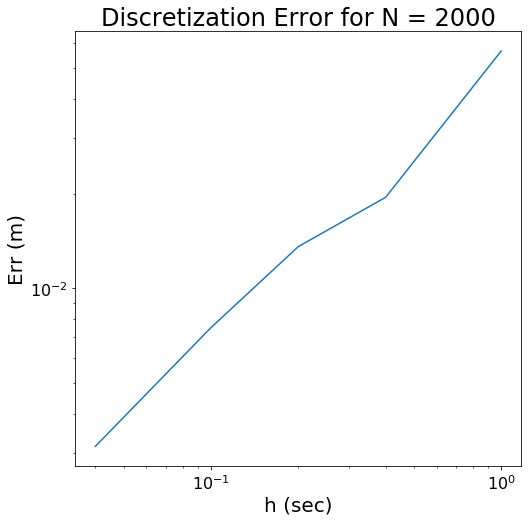

In [89]:
# Generating Error tables
S_table = np.zeros([len(N_array), len(h_var)])
D_table = np.zeros([len(N_array), len(h_var)])

# Calculates stochastic errors
S_array = abs( E_true*np.ones([len(N_array)]) - np.reshape(E_table[:,0],[len(N_array)]) )

for j in range(len(h_var)):
    S_table[:,j] = S_array
    D_table[:,j] = abs( E_table[:,0] - E_table[:,j+1] ) # calculates discretization errors

# Total Error
T_table = S_table + D_table

Nind = len(N_array) - 1 # index on N to display discretizaton error
pyt.figure(num = 3, figsize = (pltsz,pltsz))
pyt.loglog(2*h_var,D_table[Nind,:]) #changed it to 2*h_var to include more points on x-axis
pyt.xlabel('h (sec)')
pyt.ylabel('Err (m)')
pyt.title(f'Discretization Error for N = {N_array[Nind]}')

In [90]:
# Display Tables
from IPython.display import HTML, display

def round_matrix(table):
    round_table = table
    sigfigs = 2
    
    for i in range(np.size(table, axis=0)):
        for j in range(np.size(table, axis=1)):
            round_table[i,j] = str(round(table[i,j], -int(np.floor(np.log10(abs(table[i,j])))) + sigfigs)) 
    return round_table

S_round_table = round_matrix(S_table)
D_round_table = round_matrix(D_table)
T_round_table = round_matrix(T_table)

h_values = np.zeros([1,len(h_var)])
h_values = h_values.astype('str')
for i, h in enumerate(h_var):
    h_values[0,i] = "h = " + str(round(h, -int(np.floor(np.log10(abs(h)))) + 3))

N_values = np.zeros([len(N_array) + 1,1])
N_values = N_values.astype('str')
N_values[0] = ""
for i, N in enumerate(N_array):
    N_values[i+1,0] = "N = " + str(N) 

S_TABLE = np.concatenate((h_values,S_round_table), axis=0)
S_TABLE = np.concatenate((N_values,S_TABLE), axis=1)

D_TABLE = np.concatenate((h_values,D_round_table), axis=0)
D_TABLE = np.concatenate((N_values,D_TABLE), axis=1)

T_TABLE = np.concatenate((h_values,T_round_table), axis=0)
T_TABLE = np.concatenate((N_values,T_TABLE), axis=1)

print('Total Errors')
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format(
               '</td><td>'.join(im for im in row)) for row in T_TABLE
           )
       )
))

print('Stochastic Errors')
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format(
               '</td><td>'.join(im for im in row)) for row in S_TABLE
           )
       )
))

print('Discretization Errors')
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format(
               '</td><td>'.join(im for im in row)) for row in D_TABLE
           )
       )
))


Total Errors


,h = 0.5,h = 0.2,h = 0.1,h = 0.05,h = 0.02
N = 100,0.0781,0.0736,0.0603,0.0504,0.0438
N = 500,0.064,0.0219,0.0167,0.0111,0.00702
N = 1000,0.0631,0.0224,0.0175,0.0119,0.00776
N = 2000,0.0577,0.0204,0.0145,0.00845,0.0041


Stochastic Errors


,h = 0.5,h = 0.2,h = 0.1,h = 0.05,h = 0.02
N = 100,0.0392,0.0392,0.0392,0.0392,0.0392
N = 500,0.00405,0.00405,0.00405,0.00405,0.00405
N = 1000,0.00476,0.00476,0.00476,0.00476,0.00476
N = 2000,0.000951,0.000951,0.000951,0.000951,0.000951


Discretization Errors


,h = 0.5,h = 0.2,h = 0.1,h = 0.05,h = 0.02
N = 100,0.039,0.0344,0.0211,0.0112,0.00461
N = 500,0.06,0.0179,0.0127,0.00705,0.00297
N = 1000,0.0583,0.0176,0.0127,0.0071,0.003
N = 2000,0.0567,0.0195,0.0136,0.0075,0.00315


<h3><center>Conclusions and Discussion :</center></h3>

Using our analytical for comparison, we verified that Euler's method has linear convergence or converges as $O(h)$. We able to compute the expected value using randomly sampled values for $k$ and $m$ over $N$ total iterations. Finally, we generated three tables (total error, stochastic error, and discretization error), to observe the effects  on the error after varying $N$ and $h$.


Notice the discretization error decreases by approximately $\frac{h_{i+1}}{h_{i}}$ as $h$ gets smaller ($h_i < h_j$ whenever $i < j$). For example, from $h$ = 0.1 to 0.05, the error decreases by about 0.5 and $\frac{h_{3}}{h_{2}}$ = 0.5. And from $h$ = 0.05 to 0.02, the error decreases by about 0.4 and $\frac{h_{4}}{h_{3}}$ = 0.4. 

Notice for $N$ = 100, our stochastic error is a significantly large. For $N$ = 100, we see our discretization error tends to be a lot smaller than our stochastic error. What this tells us, is that our stochastic error is contributing more to the total error than our discretization error. Thus to get a better approximation, we would need to increase the number of iterations to reduce the stochastic error in our simulations. Notice in the case of $N$ = 2000, our stochastic error generally a lot smaller than our discretization error (aside from $h$ = 0.5 and 0.02). Thus our discretization error is contributing more to the total error than our stochastic error. In cases like these, we would need to use a smaller step size to bring down the discretization error to get a more accurate approximation.

Generally speaking, if our stochastic error is much smaller than our discretization error, we would focus on using smaller step sizes. If our discretization error is much smaller than our stochastic error, we would need to increase the number of iterations in our simulation. 